# Applying Multinomial Naive Bayes on DonorsChoose dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Loading the data
data = pd.read_csv('data.csv')
data.head()

school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   
2           ca            mrs          grades_prek_2   
3           ga            mrs          grades_prek_2   
4           wa            mrs             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

    clean_categories                 clean_subcategories  \
0       math_science  appliedsciences health_lifescience   
1       specialneeds                        specialneeds   
2  literacy_language                            literacy   
3    appliedlearning                    earlydevelopment   
4  literacy_language                            literacy   

                                               essay   price  
0  i fortunate enough use fairy tale stem kits cl...  725.05  
1  imagine 8 9 years old you third grade classroo...  213.03  
2  having class 24 students comes diverse learner...  329.00  
3  i recently read article giving students choice...  481.04  
4  my students crave challenge eat obstacles brea...   17.74

In [8]:
# Checking the columns and number of data points.
print(data.columns)
print(data.shape)

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')
(109248, 9)


In [9]:
# Droping the dependent varaible (project approval status) which needs to predicted.
y=data['project_is_approved'].values
X=data.drop(['project_is_approved'],axis=1)

In [10]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) 

In [11]:
print('X Train:',X_train.shape)
print('X Test:',X_test.shape)
print('y Train:',y_train.shape)
print('X Test:',y_test.shape)

X Train: (87398, 8)
X Test: (21850, 8)
y Train: (87398,)
X Test: (21850,)


# Bag of words approach

Encoding the categorical feature 'essay' with Bag of words to make data ready for the model.

In [12]:
# Applying CountVectorizer (a.k.a. bag of words) to extend the features via one hot encoding.
features=[]
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values)
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)
f=vectorizer.get_feature_names()
features.extend(f)
print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)

After vectorizations
(87398, 15260) (87398,)
(21850, 15260) (21850,)


Encoding the other categorical featues with one hot encoding

In [13]:
# Encoding feature school_state.
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
f=vectorizer.get_feature_names()
features.extend(f)

(87398, 51) (87398,)
(21850, 51) (21850,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [14]:
# Encoding feature teacher_prefix.
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
f=vectorizer.get_feature_names()
features.extend(f)

(87398, 5) (87398,)
(21850, 5) (21850,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [15]:
# Encoding feature project_grade_category.
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
f=vectorizer.get_feature_names()
features.extend(f)

(87398, 4) (87398,)
(21850, 4) (21850,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [16]:
# Encoding feature clean_categories.
vectorizer = CountVectorizer()#ngram_range=(1,2))
vectorizer.fit(X_train['clean_categories'].values)
X_train_category_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_category_ohe = vectorizer.transform(X_test['clean_categories'].values)
print(X_train_category_ohe.shape, y_train.shape)
print(X_test_category_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
f=vectorizer.get_feature_names()
features.extend(f)

(87398, 9) (87398,)
(21850, 9) (21850,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [17]:
# Encoding feature clean_subcategories.
vectorizer = CountVectorizer(ngram_range=(1,1))
vectorizer.fit(X_train['clean_subcategories'].values)
#print(len(X_train['clean_subcategories'].unique()))
X_train_subcategory_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_subcategory_ohe = vectorizer.transform(X_test['clean_subcategories'].values)
print(X_train_subcategory_ohe.shape, y_train.shape)
print(X_test_subcategory_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
f=vectorizer.get_feature_names()
features.extend(f)

(87398, 30) (87398,)
(21850, 30) (21850,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


Normalizing the numerical features to get nuerical stability without losing information.

In [18]:
# Normalizing feature price.
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm.fit(X_train['price'].values.reshape(1,-1))
X_train_price_norm = norm.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = norm.transform(X_test['price'].values.reshape(1,-1))
X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
features.append('price')

(87398, 1) (87398,)
(21850, 1) (21850,)


In [19]:
# Normalizing feature teacher_number_of_previously_posted_projects.
norm.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_teacherpostedproject_norm = norm.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacherpostedproject_norm = norm.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_train_teacherpostedproject_norm=X_train_teacherpostedproject_norm.reshape(-1,1)
X_test_teacherpostedproject_norm=X_test_teacherpostedproject_norm.reshape(-1,1)
print(X_train_teacherpostedproject_norm.shape, y_train.shape)
print(X_test_teacherpostedproject_norm.shape, y_test.shape)
features.append('teacher_number_of_previously_posted_projects')

(87398, 1) (87398,)
(21850, 1) (21850,)


Combining all the above features into a final dataset in which our model will perform.

In [20]:
# Using hstack from scipy to combine the features.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.hstack.html
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_category_ohe, X_train_subcategory_ohe, X_train_price_norm, X_train_teacherpostedproject_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_category_ohe, X_test_subcategory_ohe, X_test_price_norm, X_test_teacherpostedproject_norm)).tocsr()

print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

(87398, 15361) (87398,)
(21850, 15361) (21850,)


## Applying Naive Bayes on the dataset created above.

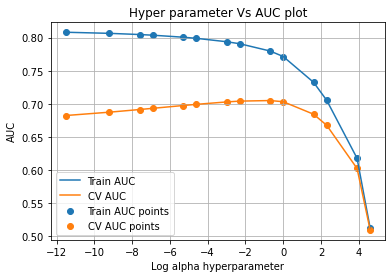

In [21]:
# Prior to fit the model we need to find out the best value for our hyperparameter alpha (Laplace Smoothing) 
# to avoid getting zero probability.
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model=MultinomialNB()

# Assigning some values for our hyperparameter.
para={'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

# Using GridSearchCv to find the best value of our hyperparameter.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
classifier=GridSearchCV(model, para, cv=5, scoring='roc_auc', return_train_score=True)
classifier.fit(X_tr, y_train)

# Putting the results of our cross-valication into a vairable.
results = pd.DataFrame.from_dict(classifier.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
alphas =  results['param_alpha']

# Coverting the alpahs to smaller values (using log) to better undertand the graph. 
a_log=[]
for i in alphas:
    a_log.append(np.log(i))

# Plotting the graph of Train score, cross validation score and alpha.
plt.plot(a_log, train_auc, label='Train AUC')
plt.plot(a_log, cv_auc, label='CV AUC')

plt.scatter(a_log, train_auc, label='Train AUC points')
plt.scatter(a_log, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Log alpha hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [23]:
# Seeing our results of cross validation.
results.sort_values(['mean_test_score'],ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
8        0.126429      0.007797         0.031245        0.000014         0.5   
7        0.118877      0.007759         0.031251        0.000014         0.1   
9        0.128821      0.010462         0.024048        0.010874           1   
5        0.134429      0.007697         0.021866        0.007660        0.05   
6        0.124997      0.009876         0.025003        0.007656        0.01   
3        0.126442      0.010301         0.025006        0.007659       0.005   
4        0.137483      0.006246         0.015625        0.000015       0.001   
1        0.128130      0.006251         0.024995        0.007658      0.0005   
2        0.137487      0.015304         0.024995        0.007658      0.0001   
10       0.136997      0.010926         0.019181        0.006090           5   
0        0.131924      0.021787         0.030399        0.010027       1e-05   
11       0.125004      0.009888         0.034362        0.006246          10   
12       0.121868      0.006250         0.024998        0.007654          50   
13       0.127586      0.006587         0.018759        0.006252         100   

               params  split0_test_score  split1_test_score  \
8      {'alpha': 0.5}           0.700466           0.699452   
7      {'alpha': 0.1}           0.697697           0.698539   
9        {'alpha': 1}           0.700090           0.697633   
5     {'alpha': 0.05}           0.695913           0.697210   
6     {'alpha': 0.01}           0.691462           0.693289   
3    {'alpha': 0.005}           0.689551           0.691430   
4    {'alpha': 0.001}           0.685284           0.687112   
1   {'alpha': 0.0005}           0.683512           0.685344   
2   {'alpha': 0.0001}           0.679748           0.681480   
10       {'alpha': 5}           0.685882           0.679202   
0    {'alpha': 1e-05}           0.675058           0.676705   
11      {'alpha': 10}           0.670926           0.662981   
12      {'alpha': 50}           0.605545           0.599809   
13     {'alpha': 100}           0.510065           0.511814   

    split2_test_score  split3_test_score  ...  mean_test_score  \
8            0.709574           0.705463  ...         0.705027   
7            0.708991           0.704112  ...         0.704174   
9            0.707614           0.703785  ...         0.703269   
5            0.707923           0.702627  ...         0.702942   
6            0.704539           0.698349  ...         0.699284   
3            0.702811           0.696348  ...         0.697530   
4            0.698434           0.691569  ...         0.693304   
1            0.696456           0.689573  ...         0.691492   
2            0.691959           0.685195  ...         0.687468   
10           0.687622           0.683757  ...         0.684405   
0            0.686166           0.680054  ...         0.682444   
11           0.669556           0.666470  ...         0.667749   
12           0.598831           0.598697  ...         0.602582   
13           0.509432           0.508724  ...         0.509902   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
8         0.004457                1            0.779223            0.780079   
7         0.005496                2            0.790156            0.791022   
9         0.003916                3            0.770995            0.771897   
5         0.005877                4            0.793175            0.794050   
6         0.006570                5            0.798333            0.799217   
3         0.006778                6            0.800012            0.800898   
4         0.007056                7            0.803033            0.803926   
1         0.007108                8            0.804041            0.804938   
2         0.007112                9            0.805851            0.806763   
10        0.002876               10            0.731856            0.733581 

From the results above we can see that the best CV score comes out when hyperparameter alpha=0.5

In [28]:
# Function to get output probabilities on the data not the predicted outputs. 
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000

    # In this for loop we will iterate until the last 1000 multiplier.
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    
    # This if condition for remaining data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

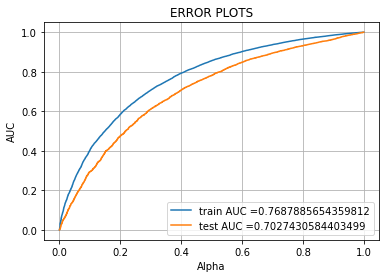

In [29]:
# Initializing the model with best value of alpha.
from sklearn.metrics import roc_curve, auc

model=MultinomialNB(alpha=0.5)
model.fit(X_tr,y_train)

# Getting the prediction values from the above function.
train_predictions=batch_predict(model, X_tr)
test_predictions=batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predictions)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predictions)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Train and Test AUC and score are 0.768 and 0.702 is achieved respectively. 

In [30]:
# Finding the best thershold for our model.
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high.
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

# Making predictions with best threshold
def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [31]:
# Getting the predictions from best threshold and printing the confusion matrix.
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
train_conf=confusion_matrix(y_train, predict_with_best_t(train_predictions, best_t))
print(train_conf)
print("Test confusion matrix")
test_conf=confusion_matrix(y_test, predict_with_best_t(test_predictions, best_t))
print(test_conf)

the maximum value of tpr*(1-fpr) 0.49513007707811524 for threshold 0.83
Train confusion matrix
[[ 9245  3989]
 [21599 52565]]
Test confusion matrix
[[ 2036  1272]
 [ 5720 12822]]


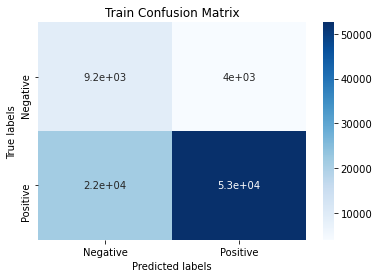

In [34]:
# Ploting the confusion matrix heatmap for training data.
# https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot();
sns.heatmap(train_conf, annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Train Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative','Positive']); 
ax.yaxis.set_ticklabels(['Negative','Positive']);
plt.show()

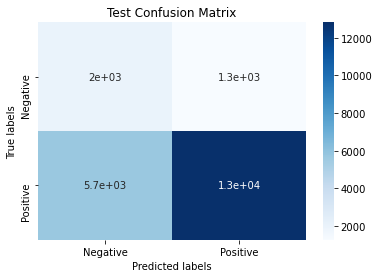

In [35]:
# Ploting the confusion matrix heatmap for training data.
#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor 
ax= plt.subplot();
sns.heatmap(test_conf, annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Test Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative','Positive']); 
ax.yaxis.set_ticklabels(['Negative','Positive']);
plt.show()

# TFIDF approach

Repeating all the above steps but replacing the Bag of words approach for feature 'essay' to TFIDF approach. 

In [36]:
data = pd.read_csv('data.csv')
#data.head()
y=data['project_is_approved'].values
X=data.drop(['project_is_approved'],axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) 

In [38]:
print('X Train:',X_train.shape)
print('X Test:',X_test.shape)
print('y Train:',y_train.shape)
print('X Test:',y_test.shape)

X Train: (87398, 8)
X Test: (21850, 8)
y Train: (87398,)
X Test: (21850,)


Encoding the categorical feature 'essay' with TFIDF vectorizer to make data ready for the model.

In [39]:
# Using scikit-learn TFIDF vectorizer.
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values)
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

After vectorizations
(87398, 15268) (87398,)
(21850, 15268) (21850,)


In [40]:
# Combining all other features with tfidf's output.
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_category_ohe, X_train_subcategory_ohe, X_train_price_norm, X_train_teacherpostedproject_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_category_ohe, X_test_subcategory_ohe, X_test_price_norm, X_test_teacherpostedproject_norm)).tocsr()

print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

(87398, 15369) (87398,)
(21850, 15369) (21850,)


Selecting best hyperparameter as done above.

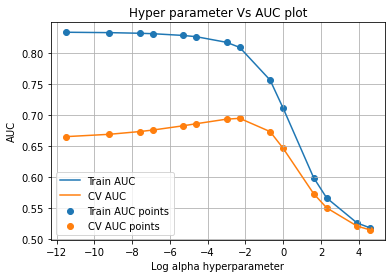

In [44]:
model=MultinomialNB()
para={'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
classifier=GridSearchCV(model, para, cv=5, scoring='roc_auc', return_train_score=True)
classifier.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(classifier.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
alphas =  results['param_alpha']

a_log=[]
for i in alphas:
    a_log.append(np.log(i))


plt.plot(a_log, train_auc, label='Train AUC')
plt.plot(a_log, cv_auc, label='CV AUC')

plt.scatter(a_log, train_auc, label='Train AUC points')
plt.scatter(a_log, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Log alpha hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [45]:
results.sort_values(['mean_test_score'],ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
7        0.131240      0.007654         0.021876        0.007647         0.1   
5        0.134355      0.012497         0.018752        0.006257        0.05   
6        0.121869      0.006253         0.024998        0.007664        0.01   
3        0.130168      0.011607         0.025354        0.007980       0.005   
4        0.141271      0.013693         0.024275        0.007295       0.001   
1        0.131237      0.015935         0.021881        0.007654      0.0005   
8        0.134374      0.012497         0.021868        0.007654         0.5   
2        0.133040      0.012748         0.024878        0.007564      0.0001   
0        0.122899      0.013426         0.028122        0.006259       1e-05   
9        0.121871      0.011693         0.025011        0.007656           1   
10       0.128113      0.006248         0.018752        0.006250           5   
11       0.131238      0.007653         0.021873        0.007658          10   
12       0.128106      0.011695         0.021871        0.007650          50   
13       0.123545      0.002912         0.028131        0.006246         100   

               params  split0_test_score  split1_test_score  \
7      {'alpha': 0.1}           0.690178           0.695416   
5     {'alpha': 0.05}           0.688609           0.693080   
6     {'alpha': 0.01}           0.680702           0.684085   
3    {'alpha': 0.005}           0.677126           0.680233   
4    {'alpha': 0.001}           0.669870           0.672427   
1   {'alpha': 0.0005}           0.667362           0.669724   
8      {'alpha': 0.5}           0.669926           0.677920   
2   {'alpha': 0.0001}           0.663017           0.664884   
0    {'alpha': 1e-05}           0.659437           0.660822   
9        {'alpha': 1}           0.643929           0.652438   
10       {'alpha': 5}           0.571699           0.578200   
11      {'alpha': 10}           0.547746           0.553829   
12      {'alpha': 50}           0.516421           0.521145   
13     {'alpha': 100}           0.510382           0.514093   

    split2_test_score  split3_test_score  ...  mean_test_score  \
7            0.701059           0.697988  ...         0.694328   
5            0.700737           0.697901  ...         0.693010   
6            0.694560           0.691705  ...         0.685623   
3            0.691573           0.688548  ...         0.682277   
4            0.685504           0.681848  ...         0.675391   
1            0.683354           0.679428  ...         0.672944   
8            0.674557           0.671638  ...         0.672887   
2            0.679505           0.674950  ...         0.668537   
0            0.676053           0.671059  ...         0.664743   
9            0.644925           0.642216  ...         0.645810   
10           0.569935           0.567452  ...         0.572770   
11           0.546789           0.545871  ...         0.549773   
12           0.517655           0.519777  ...         0.520293   
13           0.511903           0.514259  ...         0.514144   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
7         0.005116                1            0.809836            0.809813   
5         0.005860                2            0.818319            0.817621   
6         0.006584                3            0.827729            0.826212   
3         0.006732                4            0.829840            0.828138   
4         0.007052                5            0.832754            0.830804   
1         0.007175                6            0.833491            0.831477   
8         0.002989                7            0.756112            0.758294   
2         0.007384                8            0.834541            0.832430   
0         0.007509                9            0.835192            0.833018   
9         0.003500               10            0.710123            0.712409 

From the results above we can see that the best CV score comes out when hyperparameter alpha=0.1

Getting probabilities

In [46]:
def batch_predict(clf, data):

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000

    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])

    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

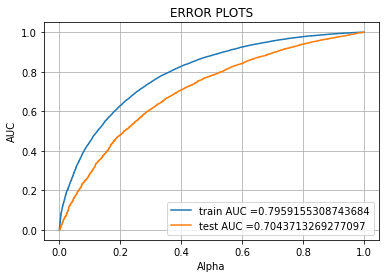

In [47]:
from sklearn.metrics import roc_curve, auc

model=MultinomialNB(alpha=0.1)
model.fit(X_tr,y_train)
train_predictions=batch_predict(model, X_tr)
test_predictions=batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_predictions)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_predictions)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Predicting with best threshold.

In [48]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
train_conf=confusion_matrix(y_train, predict_with_best_t(train_predictions, best_t))
print(train_conf)
print("Test confusion matrix")
test_conf=confusion_matrix(y_test, predict_with_best_t(test_predictions, best_t))
print(test_conf)

the maximum value of tpr*(1-fpr) 0.5239064877248993 for threshold 0.846
Train confusion matrix
[[ 9468  3766]
 [19854 54310]]
Test confusion matrix
[[ 1966  1342]
 [ 5340 13202]]


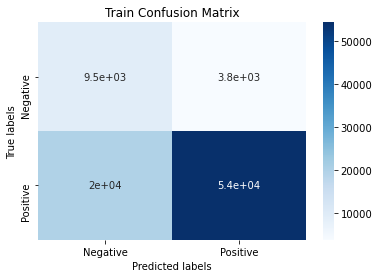

In [50]:
#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot();
sns.heatmap(train_conf, annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Train Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative','Positive']); 
ax.yaxis.set_ticklabels(['Negative','Positive']);
plt.show()

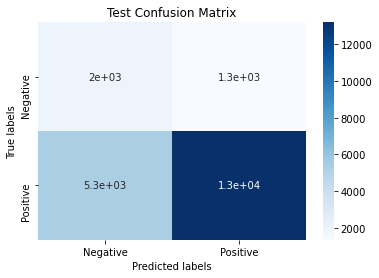

In [51]:
#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor 
ax= plt.subplot();
sns.heatmap(test_conf, annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Test Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative','Positive']); 
ax.yaxis.set_ticklabels(['Negative','Positive']);
plt.show()

## Summary

| Vectorizer | Hyperparameter | Test AUC |
| :- | :-: | :-: |
| BOW | 0.5 | 0.70
| TFIDF | 0.1 | 0.70